# Superconductivity ML Mini Project

This notebook covers data loading, visualization, regression, classification, clustering, dimensionality reduction, and MLops workflow comparison using the UCI Superconductivity dataset.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report
import pickle
from ucimlrepo import fetch_ucirepo

# Fetch dataset
superconductivity_data = fetch_ucirepo(id=464)

# Data (as pandas dataframes)
X = superconductivity_data.data.features
y = superconductivity_data.data.targets

# Metadata
print(superconductivity_data.metadata)

# Variable information
print(superconductivity_data.variables)

# Prepare data: Handle any missing values if present
X = X.fillna(X.mean())
y = y.fillna(y.mean())

# For classification, binarize y (high/low superconductivity based on median)
y_class = (y > y.median()).astype(int)

{'uci_id': 464, 'name': 'Superconductivty Data', 'repository_url': 'https://archive.ics.uci.edu/dataset/464/superconductivty+data', 'data_url': 'https://archive.ics.uci.edu/static/public/464/data.csv', 'abstract': 'Two file s contain data on 21263 superconductors and their relevant features.', 'area': 'Physics and Chemistry', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 21263, 'num_features': 81, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['critical_temp'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2018, 'last_updated': 'Fri Mar 29 2024', 'dataset_doi': '10.24432/C53P47', 'creators': ['Kam Hamidieh'], 'intro_paper': {'ID': 452, 'type': 'NATIVE', 'title': 'A data-driven statistical model for predicting the critical temperature of a superconductor', 'authors': 'K. Hamidieh', 'venue': 'Computational materials science', 'year': 2018, 'journal': None, 'DOI': None, 'URL': 'http

## 1. Data Visualization

Objective: Study and implement different data visualization methods to understand the dataset.

We will use histograms, scatter plots, correlation heatmaps, and box plots to explore features and targets.

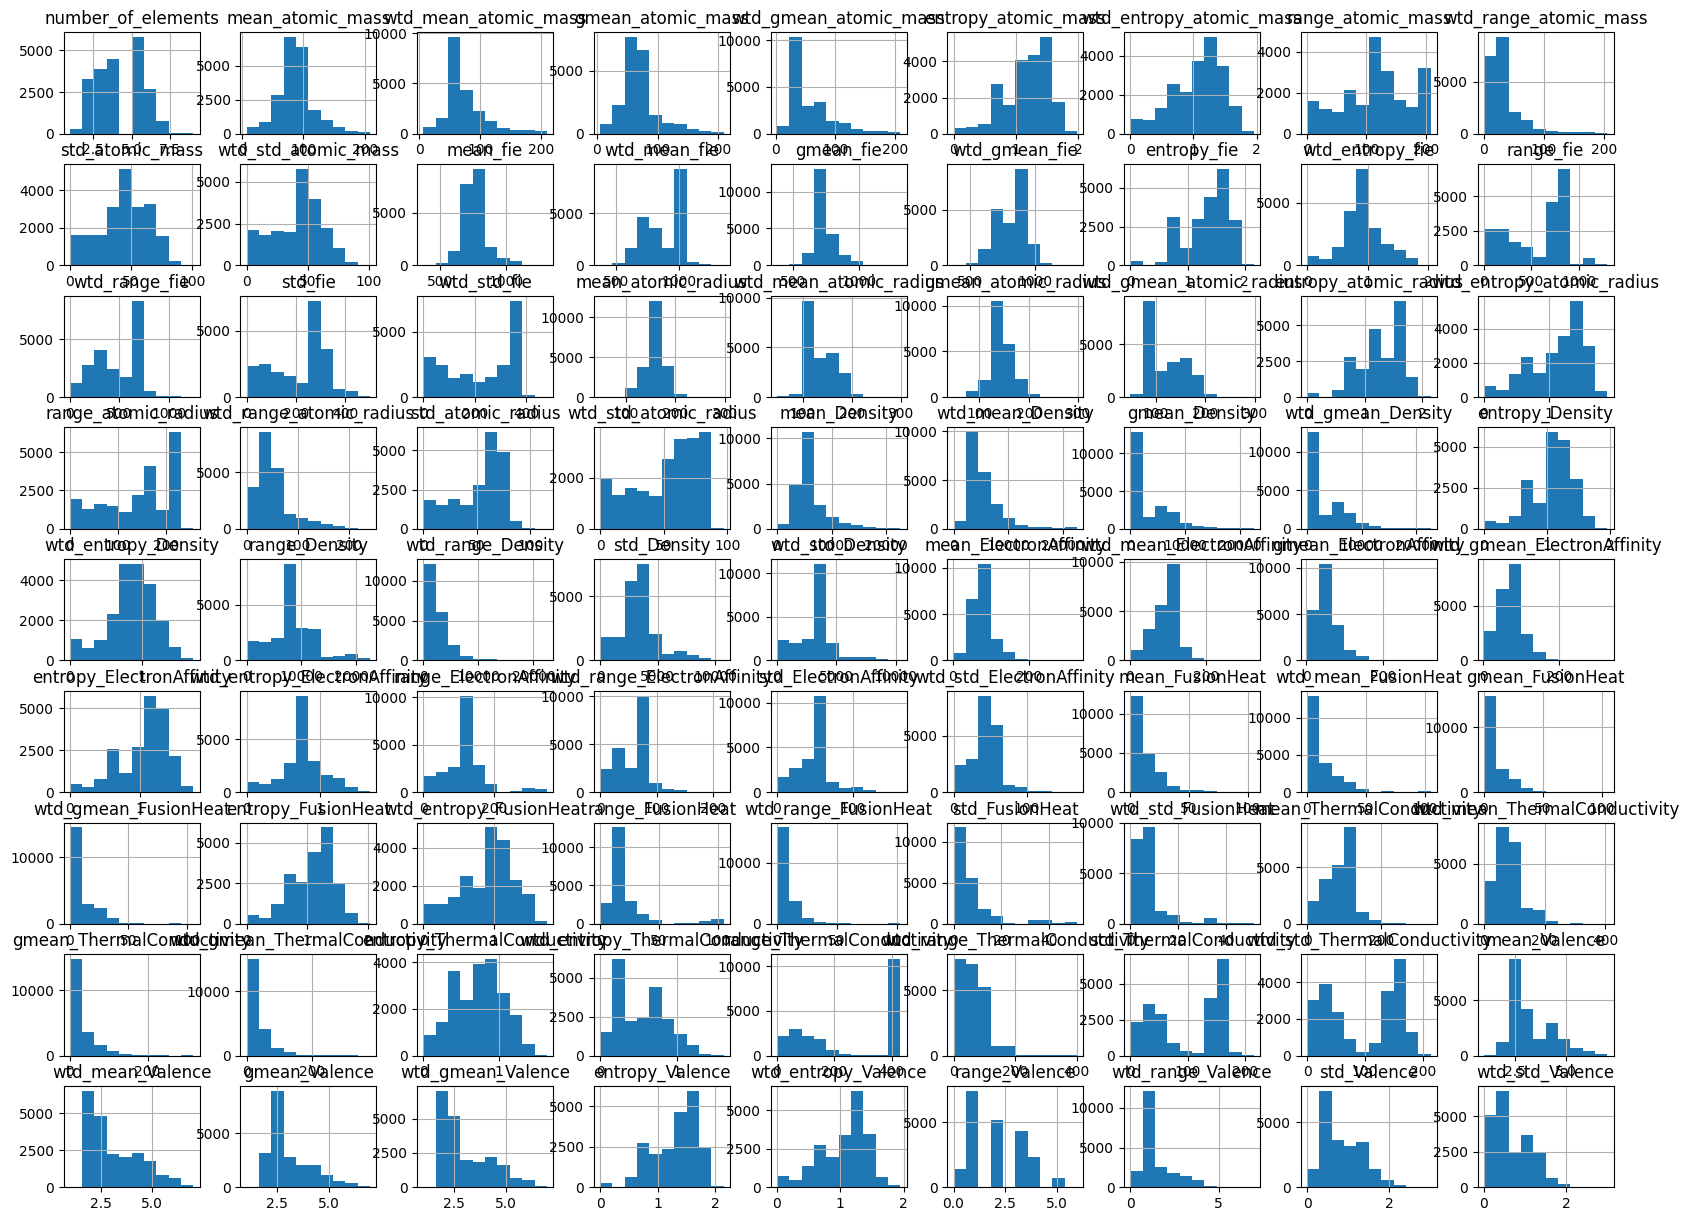

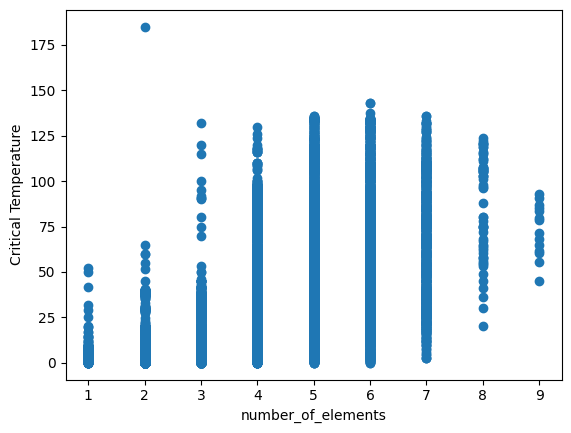

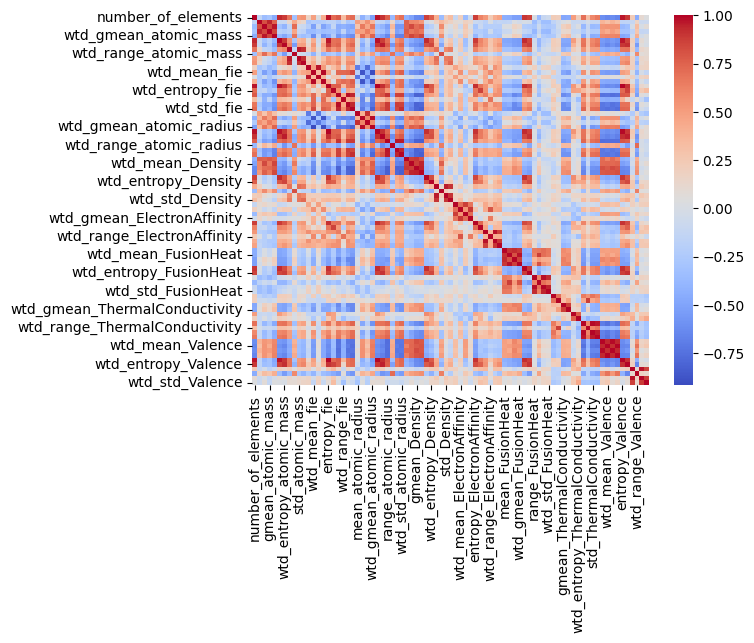

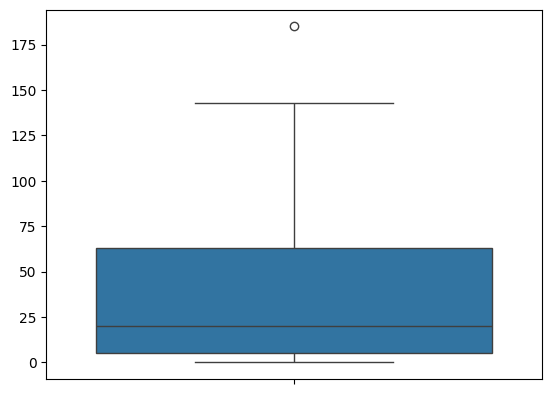

In [11]:
# Histograms of features
X.hist(figsize=(20, 15))
plt.show()

# Scatter plot of first two features vs target
plt.scatter(X.iloc[:, 0], y.values.flatten())
plt.xlabel(X.columns[0])
plt.ylabel('Critical Temperature')
plt.show()

# Correlation heatmap
corr = X.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.show()

# Box plot of target
sns.boxplot(y.values.flatten())
plt.show()

## 2. Linear Regression for Prediction

Objective: Apply Linear Regression for prediction purposes and estimate the errors associated with it.

We train a linear model to predict critical temperature and evaluate MSE and R².

In [12]:
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}, R²: {r2}')

# Store model
pickle.dump(lr, open('linear_regression.pkl', 'wb'))

MSE: 302.0075125501196, R²: 0.7376312737139078


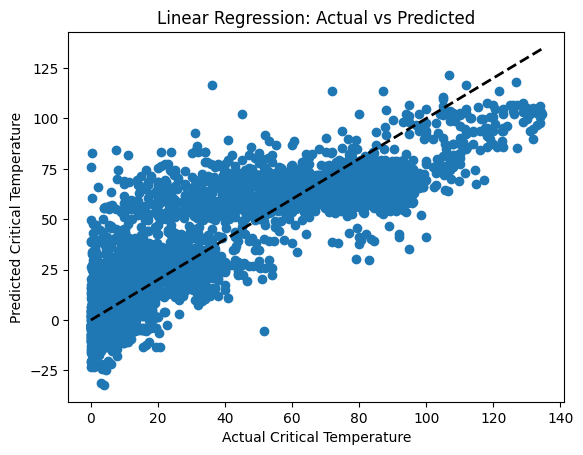

In [13]:
# Visualization: Actual vs Predicted with best fit line
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Critical Temperature')
plt.ylabel('Predicted Critical Temperature')
plt.title('Linear Regression: Actual vs Predicted')
plt.show()

## 3. Classification using Trees

Objective: Identify the classification problem (high/low superconductivity) and solve using trees, evaluate performance measures.

We use Decision Tree Classifier and evaluate accuracy and classification report.

In [14]:
from sklearn.tree import DecisionTreeClassifier

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y_class, test_size=0.2, random_state=42)

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_c, y_train_c)

y_pred_c = dt.predict(X_test_c)
acc = accuracy_score(y_test_c, y_pred_c)
print(f'Accuracy: {acc}')
print(classification_report(y_test_c, y_pred_c))

# Store model
pickle.dump(dt, open('decision_tree.pkl', 'wb'))

Accuracy: 0.9313425817070303
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      2163
           1       0.93      0.93      0.93      2090

    accuracy                           0.93      4253
   macro avg       0.93      0.93      0.93      4253
weighted avg       0.93      0.93      0.93      4253



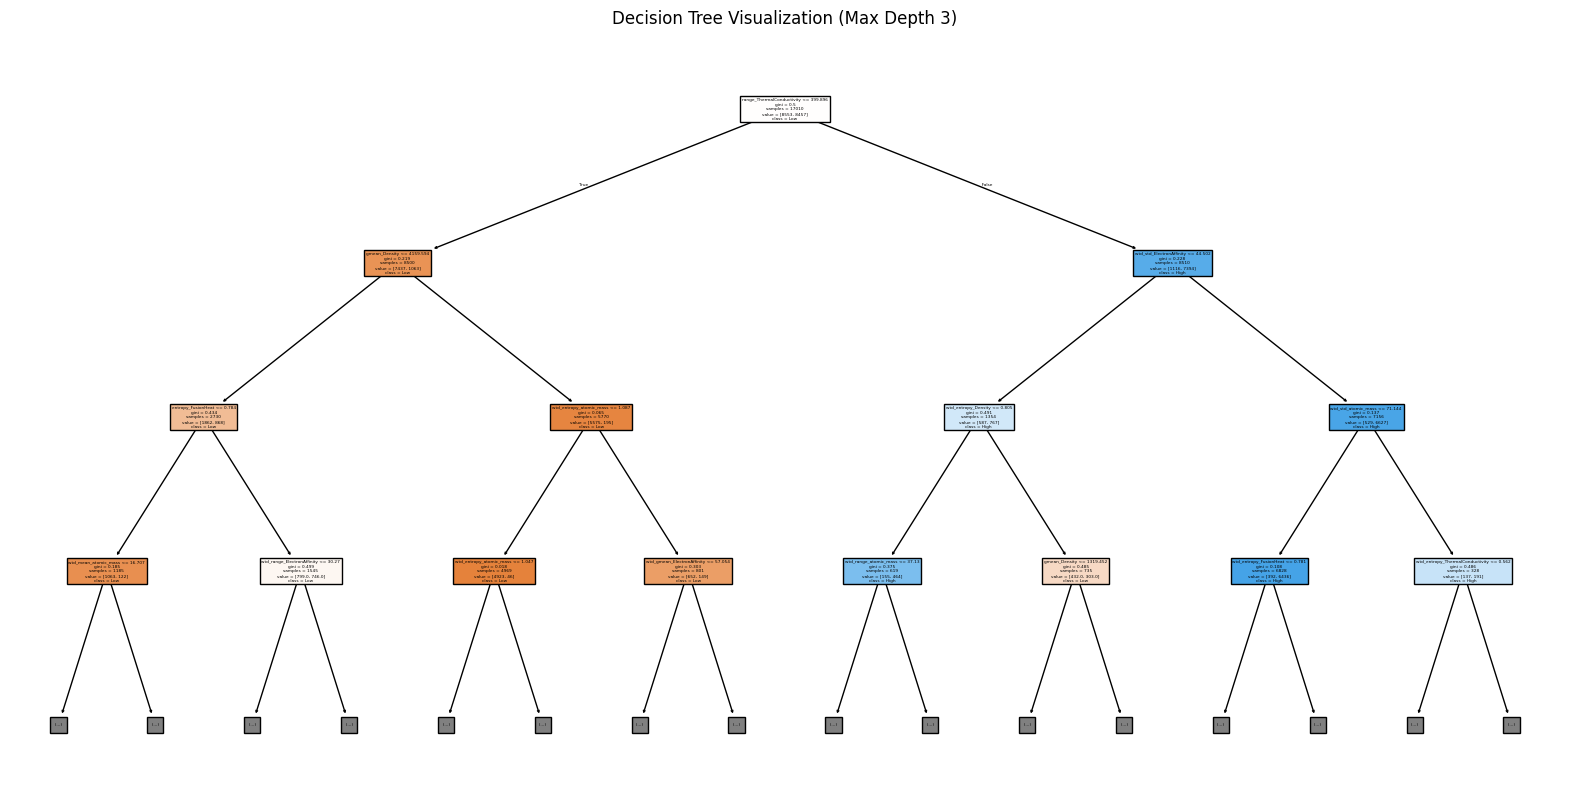

In [15]:
# Visualization: Plot decision tree
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(dt, filled=True, feature_names=X.columns, class_names=['Low', 'High'], max_depth=3)
plt.title('Decision Tree Visualization (Max Depth 3)')
plt.show()

## 4. Support Vector Machine for Classification

Objective: Use SVM to solve the classification problem and evaluate performance measures.

We use SVC and evaluate accuracy and report.

In [16]:
from sklearn.svm import SVC

svm = SVC(random_state=42)
svm.fit(X_train_c, y_train_c)

y_pred_svm = svm.predict(X_test_c)
acc_svm = accuracy_score(y_test_c, y_pred_svm)
print(f'Accuracy: {acc_svm}')
print(classification_report(y_test_c, y_pred_svm))

# Store model
pickle.dump(svm, open('svm.pkl', 'wb'))

c:\Users\manas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.8669174700211615
              precision    recall  f1-score   support

           0       0.92      0.81      0.86      2163
           1       0.83      0.92      0.87      2090

    accuracy                           0.87      4253
   macro avg       0.87      0.87      0.87      4253
weighted avg       0.87      0.87      0.87      4253



In [17]:
# Visualization: SVM hyperplane on 2D PCA
from sklearn.decomposition import PCA
pca_vis = PCA(n_components=2)
X_train_pca = pca_vis.fit_transform(X_train_c)
X_test_pca = pca_vis.transform(X_test_c)
svm_pca = SVC(random_state=42)
svm_pca.fit(X_train_pca, y_train_c)
# Plot decision boundary
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = svm_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train_c, edgecolors='k')
plt.title('SVM Hyperplane on 2D PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

c:\Users\manas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MemoryError: Unable to allocate 1.02 TiB for an array with shape (295894, 474535) and data type float64

## 5. Ensemble Learning (Bagging/Boosting)

Objective: Implement Ensemble Learning for complex pattern recognition tasks.

We use Random Forest (bagging) and Gradient Boosting (boosting) for classification.

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Random Forest (Bagging)
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_c, y_train_c)
y_pred_rf = rf.predict(X_test_c)
print(f'RF Accuracy: {accuracy_score(y_test_c, y_pred_rf)}')
pickle.dump(rf, open('random_forest.pkl', 'wb'))

# Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train_c, y_train_c)
y_pred_gb = gb.predict(X_test_c)
print(f'GB Accuracy: {accuracy_score(y_test_c, y_pred_gb)}')
pickle.dump(gb, open('gradient_boosting.pkl', 'wb'))

c:\Users\manas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RF Accuracy: 0.9506230895838231


c:\Users\manas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GB Accuracy: 0.9301669409828357


In [ ]:
# Visualization: Feature importance for Random Forest
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10,6))
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.title('Random Forest Feature Importances')
plt.show()

## 6. Multivariate Nonlinear Regression

Objective: Study and implement Multivariate nonlinear Regression.

We use Polynomial Features with Linear Regression for nonlinearity.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

lr_poly = LinearRegression()
lr_poly.fit(X_poly, y_train)

y_pred_poly = lr_poly.predict(X_test_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)
print(f'Poly MSE: {mse_poly}, R²: {r2_poly}')

# Store model
pickle.dump(lr_poly, open('poly_regression.pkl', 'wb'))

Poly MSE: 385.4661138896624, R²: 0.6651266967708402


In [ ]:
# Visualization: Actual vs Predicted for Polynomial Regression
plt.scatter(y_test, y_pred_poly)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Critical Temperature')
plt.ylabel('Predicted Critical Temperature')
plt.title('Polynomial Regression: Actual vs Predicted')
plt.show()

In [ ]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
clusters_km = kmeans.fit_predict(X_scaled)
print(f'K-Means clusters: {np.unique(clusters_km)}')
pickle.dump(kmeans, open('kmeans.pkl', 'wb'))

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters_db = dbscan.fit_predict(X_scaled)
print(f'DBSCAN clusters: {np.unique(clusters_db)}')
pickle.dump(dbscan, open('dbscan.pkl', 'wb'))

K-Means clusters: [0 1 2]
DBSCAN clusters: [ -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106
 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124
 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142
 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160
 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178
 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196
 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214
 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232
 233 234

In [ ]:
# Visualization: K-Means clusters on 2D PCA
pca_clust = PCA(n_components=2)
X_pca_clust = pca_clust.fit_transform(X_scaled)
plt.scatter(X_pca_clust[:, 0], X_pca_clust[:, 1], c=clusters_km, cmap='viridis')
plt.title('K-Means Clusters on 2D PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)
print(f'Explained variance: {pca.explained_variance_ratio_}')
pickle.dump(pca, open('pca.pkl', 'wb'))

# SVD
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=10)
X_svd = svd.fit_transform(X_scaled)
print(f'SVD explained variance: {svd.explained_variance_ratio_}')
pickle.dump(svd, open('svd.pkl', 'wb'))

Explained variance: [0.38931798 0.10482209 0.095212   0.0790773  0.05882183 0.03788369
 0.03622251 0.03107107 0.02361113 0.0197788 ]
SVD explained variance: [0.38931798 0.10482209 0.095212   0.0790773  0.05882183 0.03788369
 0.03622251 0.03107107 0.02361113 0.0197788 ]


In [ ]:
# Visualization: Cumulative explained variance for PCA
cum_var = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, len(cum_var)+1), cum_var, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Cumulative Explained Variance')
plt.show()

## 9. MLops Workflow and AI Tools Comparison

Objective: Study the MLops workflow and comparison of AI tools such as Orange, Rapidminer, and Weka.

**MLops Workflow:** Involves data collection, preprocessing, model training, evaluation, deployment, monitoring, and iteration. Tools like DVC, MLflow, or Kubeflow automate this.

**Comparison:**
- **Orange:** User-friendly GUI for data mining, good for beginners, supports visualization but limited scalability.
- **RapidMiner:** Drag-and-drop interface, strong in automation and enterprise use, supports big data.
- **Weka:** Open-source, Java-based, excellent for algorithms and research, but less user-friendly for non-programmers.

In this notebook, we manually implemented steps; for production, integrate with MLops tools.